# **DATA EXPLORATION**

In this file, we explore the dataset of our project related to predict if a hotel reservation will be canceled or not. The objective of our model is basically to predict the *is_canceled* column: https://www.kaggle.com/datasets/thedevastator/hotel-bookings-analysis.

**Members of the group:** Guevara Vela Gerard,
Laleu Alexandre,
Victor Sacha.

We start by importing useful librairies and access the drive where the dataset is located.

In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/IAAE/data/hotel_bookings.csv')

Mounted at /content/drive


## 1. Deleting irrelevant columns and focusing only on one hotel

Since the dataset is related to two hotels: 'City Hotel' and 'Resort Hotel' and that more than 60% of the data (around 70 000 rows) is related to the city hotel, we decide to focus our analysis only on the 'City Hotel'; so really our model just predicts if the City hotel will be cancelled or not.

Furthermore, we delete examples that we do not know if it has been canceled or not.

In [ ]:
df = df[(df['reservation_status'] != 'No-Show') & (df['hotel'] == 'City Hotel')]
print(f"Remaining rows : {len(df['hotel'])}")

Remaining rows : 78414


After reading the data description, we decide that some columns might be irrelevant for our prediction model so we decided to delete them.

*   *index* column is only couting rows.
*   *hotel* column is no longer relevant since we kept only the City Hotel.
*   *babies* column is the number of babies included in the book. Since the overwhelming majority of bookings has no babies (almost no no zero values) we decided to remove this column.
*  *reservation_status* represents the status of the reservation (e.g., canceled, checked-in, no-show) but is very redundant with the 'is_canceled' column we think that not much relevant information this column provides.
* *company* is the ID of the company that made the booking. We decide that is not really relevant and since it is only ID numbers with an important range, it can mislead the model
* *reservation_status_date* is the date when the last change in the book has been made. We think this information is not very usefull in our binary model.



In [ ]:
df = df.drop(columns=['index', 'hotel', 'babies', 'reservation_status', 'company', 'reservation_status_date', 'assigned_room_type'])

## 2. Managing missing data

Let's check if there are any missing values and the types of data do we have for each feature.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78414 entries, 40060 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     78414 non-null  int64  
 1   lead_time                       78414 non-null  int64  
 2   arrival_date_year               78414 non-null  int64  
 3   arrival_date_month              78414 non-null  object 
 4   arrival_date_week_number        78414 non-null  int64  
 5   arrival_date_day_of_month       78414 non-null  int64  
 6   stays_in_weekend_nights         78414 non-null  int64  
 7   stays_in_week_nights            78414 non-null  int64  
 8   adults                          78414 non-null  int64  
 9   children                        78410 non-null  float64
 10  meal                            78414 non-null  object 
 11  country                         78390 non-null  object 
 12  market_segment                  

We can see there're numerical and categorical features, so we will have to transform de categorical. Also, we do have missing data, so firstly we will replace missing values by Not A Number:

In [ ]:
df = df.replace("", pd.NA)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78414 entries, 40060 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     78414 non-null  int64  
 1   lead_time                       78414 non-null  int64  
 2   arrival_date_year               78414 non-null  int64  
 3   arrival_date_month              78414 non-null  object 
 4   arrival_date_week_number        78414 non-null  int64  
 5   arrival_date_day_of_month       78414 non-null  int64  
 6   stays_in_weekend_nights         78414 non-null  int64  
 7   stays_in_week_nights            78414 non-null  int64  
 8   adults                          78414 non-null  int64  
 9   children                        78410 non-null  float64
 10  meal                            78414 non-null  object 
 11  country                         78390 non-null  object 
 12  market_segment                  

We can see there are some columns with missing data we have to work in.

We delete rows without data in *children* and *country* columns since it represents only a very little part of the data.

In [ ]:
df = df.dropna(subset=['children', 'country'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78386 entries, 40060 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     78386 non-null  int64  
 1   lead_time                       78386 non-null  int64  
 2   arrival_date_year               78386 non-null  int64  
 3   arrival_date_month              78386 non-null  object 
 4   arrival_date_week_number        78386 non-null  int64  
 5   arrival_date_day_of_month       78386 non-null  int64  
 6   stays_in_weekend_nights         78386 non-null  int64  
 7   stays_in_week_nights            78386 non-null  int64  
 8   adults                          78386 non-null  int64  
 9   children                        78386 non-null  float64
 10  meal                            78386 non-null  object 
 11  country                         78386 non-null  object 
 12  market_segment                  

As we can see, we just have missing data in the agent column, that will be properly treated in the numerical column analysis, so we can conclude this section.

## 3. Numerical columns describing


By describing the basic statistics of each numerical feature and it's histograms, we will be able to decide if there're any weird information, in order to study them more deeply.

**Statistics:**

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,78386.000000,78386.000000,78386.000000,78386.000000,78386.000000,78386.000000,78386.000000,78386.000000,78386.000000,78386.000000,78386.000000,78386.000000,78386.000000,70395.000000,78386.000000,78386.000000,78386.000000,78386.000000
mean,0.410277,110.351083,2016.175082,27.219070,15.770916,0.791289,2.177060,1.853724,0.091241,0.025464,0.080627,0.132575,0.187227,28.090702,3.265634,105.371088,0.024660,0.547406
std,0.491887,111.256807,0.699950,13.378977,8.724493,0.878521,1.430188,0.507604,0.371867,0.157530,0.417705,1.694880,0.608924,56.504350,20.993167,43.627772,0.155826,0.781102
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,79.200000,0.000000,0.000000
50%,0.000000,74.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,100.000000,0.000000,0.000000
75%,1.000000,164.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,4.000000,3.000000,1.000000,21.000000,72.000000,21.000000,509.000000,391.000000,5400.000000,3.000000,5.000000


**Histograms:**

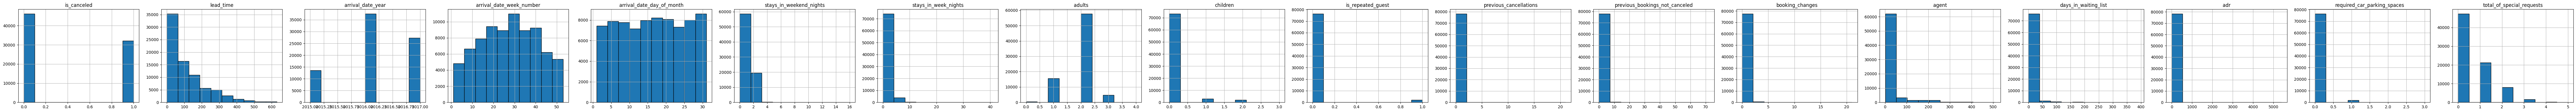

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns

num_cols = len(numeric_cols)
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(5 * num_cols, 4))

for ax, col in zip(axes, numeric_cols):
    df[col].hist(ax=ax, bins=10, edgecolor='black')
    ax.set_title(col)

plt.tight_layout()
plt.show()

Thanks to statistics and histograms, we spotted weird distributions that need further exploration:

* adr
* days_in_waiting_list
* stays_in_weekend_nights
* stays_in_week_nights
* previous_cancellations
* previous_bookings_not_cancelled
* booking_changes
* agents


We will deal with each of them later.

**Correlation matrix:**

To see if there're any features correlated we will plot a correlation matrix.

<Axes: >

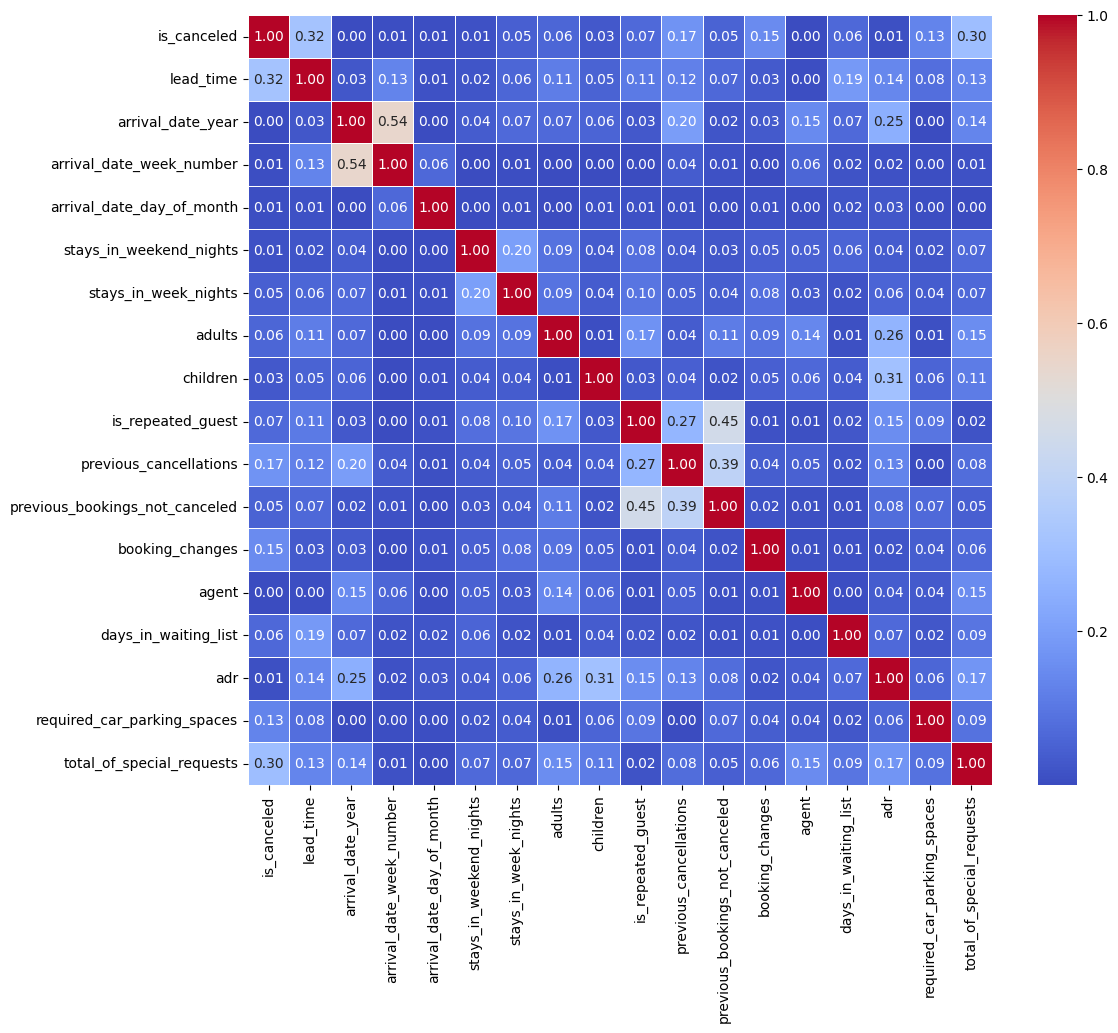

In [ ]:
corr_df = df[numeric_cols].corr().abs()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_df, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

We do not see any excessive correlation so no more numerical column needs to be removed, as no information seems redundant.

##4. Numerical categories analysis

**adr colunm**:

<Axes: ylabel='adr'>

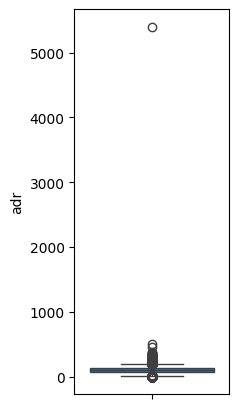

In [ ]:
plt.figure(figsize=(2,5))
sns.boxplot(data=df['adr'])

As we only see one clearly identified outlier, we decided to delete it.

In [ ]:
df = df[df['adr']!=5400]

<Axes: ylabel='adr'>

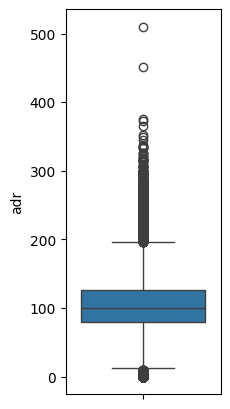

In [ ]:
plt.figure(figsize=(2,5))
sns.boxplot(data=df['adr'])

In [ ]:
# count the number of values that in the adr feature are equal to 0
print(df[df['adr']==0]['adr'].count())

1185


With the updatet boxplot, we do have still many outliers. The ones above the Q3 we will keep them, as they're relevant information that can be perfectly possible. Nevertheless, we have several data with value 0. This feature refers to the average daily rate (price per room) for the booking, so we don't think it's a realistic situation for a room to be for free, so we decided to delete this data.

In [ ]:
# delete the examples with the feature adr equal to 0 and save it in the original dataframe
df = df[df['adr']!=0]

**days_in_waiting_list** **column:**

<Axes: ylabel='days_in_waiting_list'>

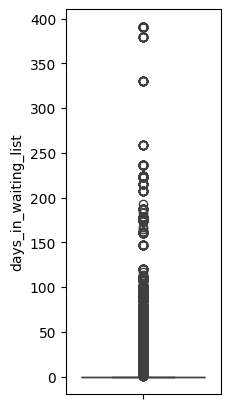

In [ ]:
plt.figure(figsize=(2,5))
sns.boxplot(data=df['days_in_waiting_list'])

We have several outliers here. Let's explore more the column.

In [ ]:
df[df['days_in_waiting_list']>0]["days_in_waiting_list"].value_counts()

,count
days_in_waiting_list,
39,226
58,164
44,140
31,127
35,96
...,...
74,1
167,1
83,1


We initially expected that the most common outliers would be the ones that refer to short period of time in waiting list (like a few days) but it seems that it is not the case. So here we decided to not delete rows with outliers because that can imply losing relevant data.

Let's check the histogram of no-null values

<Axes: >

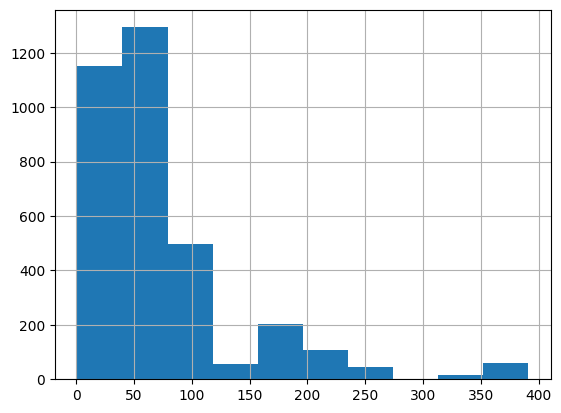

In [ ]:
df[df['days_in_waiting_list']>0]["days_in_waiting_list"].hist()

The boxplot show us there are many data outside the common values. We don't think deleting all the data would be wise, so we will discretize the categorie.

As the no-null values distribution isn't what we expected (the distribution should be more linear, always decreasing), we decided the grouping will be done by "common sence".  

In order to keep enough information but also to simplify a little bit, the 6 categories are defined as follow:
- we keep 0 value if no days in waiting list
- we attribute 1 if the value represents less than a week
- 2 if less than two weeks
- 3 if less than a months
- 4 if less than 3 months
- 5 if more than that

**stays_in_weekend_nights** **column:**

<Axes: ylabel='stays_in_weekend_nights'>

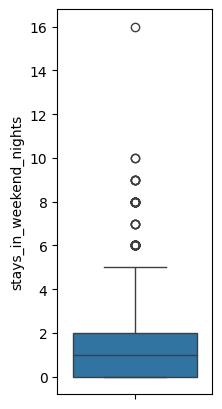

In [ ]:
plt.figure(figsize=(2,5))
sns.boxplot(data=df['stays_in_weekend_nights'])

Here again, several outliers are identified. Let's see how many examples they involve.

In [ ]:
df[df['stays_in_weekend_nights']>5]["stays_in_weekend_nights"].value_counts()

,count
stays_in_weekend_nights,
6,30
8,19
9,5
7,4
10,2
16,1


In this case there are few data that de boxplot consider them outliers. Also we don't think it's realistic to consider people staying more than one month. In order to keep all the information, we will fix all the data above 6 weekends nights to the value 6.  It is like creating a 'more than 5 stays_in_weekend_nights' category.

**stays_in_week_nights column**:

<Axes: ylabel='stays_in_week_nights'>

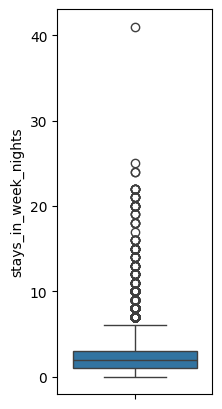

In [ ]:
plt.figure(figsize=(2,5))
sns.boxplot(data=df['stays_in_week_nights'])

In [ ]:
df[df['stays_in_week_nights']>0]["stays_in_week_nights"].value_counts()

,count
stays_in_week_nights,
2,25965
1,20330
3,16199
4,6050
5,3200
6,360
7,180
8,146
10,123


As in the previous case, there are few data that de boxplot consider them outliers, so the resolution will be the same as before: create the 'staying more than 5 week days' category.

**previous_cancellations column:**

<Axes: ylabel='previous_cancellations'>

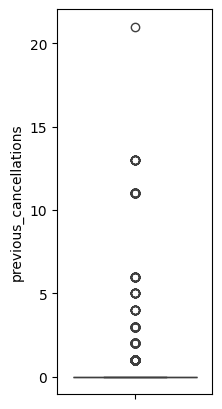

In [ ]:
plt.figure(figsize=(2,5))
sns.boxplot(data=df['previous_cancellations'])

Here again, several outliers let's count them.

In [ ]:
df[df['previous_cancellations']>0]["previous_cancellations"].value_counts()

,count
previous_cancellations,
1,5112
2,53
3,43
11,35
6,22
13,12
5,11
4,10
21,1


In this case, we have plenty of data with 0 or 1 cancellation, so we think this information should be kept. Also there are some data above 1, and we don't think it should have the same importance having cancelled 3 or 10 times, so we will keep this information, but in different groups.  

Create 4 groups : 0, 1, [2;6], >6

**Previous_bookings_not_cancelled cancellation column:**

<Axes: ylabel='previous_bookings_not_canceled'>

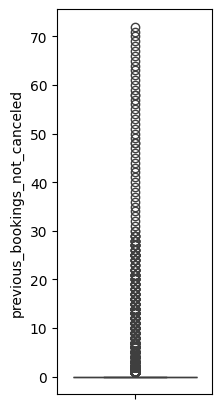

In [ ]:
plt.figure(figsize=(2,5))
sns.boxplot(data=df['previous_bookings_not_canceled'])

We have several outilers. Let's explore them

In [ ]:
df[df['previous_bookings_not_canceled']>0]["previous_bookings_not_canceled"].value_counts()

,count
previous_bookings_not_canceled,
1,499
2,165
3,108
4,91
5,76
...,...
68,1
71,1
70,1


As we made in other features, we will sort this column in different groups.
  1. examples with 0 previous bookings
  2. examples between [1,5] previous bookings (punctual guests)
  3. examples with 6 or more previous bookings (regular guests)

**Booking changes column**

<Axes: ylabel='booking_changes'>

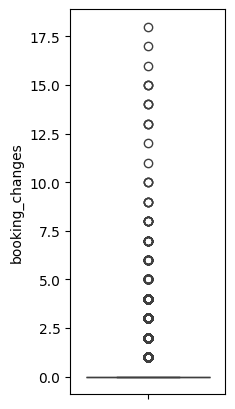

In [ ]:
plt.figure(figsize=(2,5))
sns.boxplot(data=df['booking_changes'])

In [ ]:
df[df['booking_changes']>0]["booking_changes"].value_counts()

,count
booking_changes,
1,6913
2,2151
3,450
4,182
5,44
6,28
7,16
8,8
9,4


In this case we 're also going to aply some transformation:
  1. Examples with 0 booking changes
  2. Examples with 1 booking change
  3. Examples between [2,5] booking changes
  4. Examples with 6 or more booking changes

**Agents column**:

In [ ]:
df['agent'].value_counts()

,count
agent,
9.0,31484
1.0,7024
14.0,3533
7.0,3489
6.0,2613
...,...
388.0,1
453.0,1
480.0,1


As there's a lot of different ID's, we are going to keep the 5 biggest IDs that represent more than 70% of the total reservations, and the rest will be considered other ID's:

In [ ]:
id_counts = df['agent'].value_counts()

cumulative_sum = id_counts.cumsum()

total_counts = id_counts.sum()
threshold = total_counts * 0.7
selected_ids = id_counts[cumulative_sum <= threshold].index

print(selected_ids)

Index([9.0, 1.0, 14.0, 7.0, 6.0], dtype='float64', name='agent')


## 5. Categorical columns analysis

In this section, we will explore the situation of our categorical columns one by one







**arrival_dates columns**:

As we have three columns that contain information about the date when the reservation was made, we will analyze them together in orther to see if we can make any simplification of them

First we check the categories of the months are well written

In [ ]:
df['arrival_date_month'].value_counts()

,count
arrival_date_month,
August,8791
May,8021
July,7904
June,7754
October,7403
April,7343
September,7226
March,6281
February,4691


We can see all the 12 months of the year, so it's correct.

<Axes: >

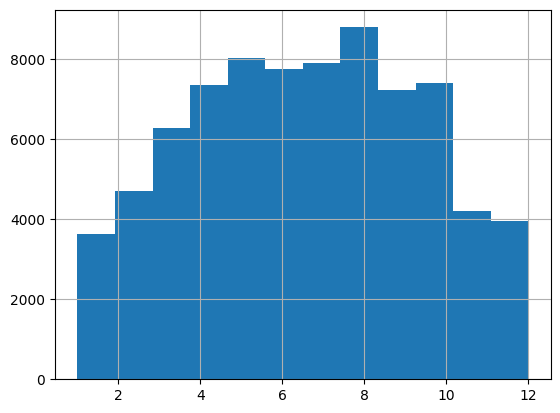

In [ ]:
month_map = {
    "January": 1, "February": 2, "March": 3, "April": 4,
    "May": 5, "June": 6, "July": 7, "August": 8,
    "September": 9, "October": 10, "November": 11, "December": 12
}

df["arrival_date_month"] = df["arrival_date_month"].map(month_map)

df['arrival_date_month'].hist(bins=12)

<Axes: >

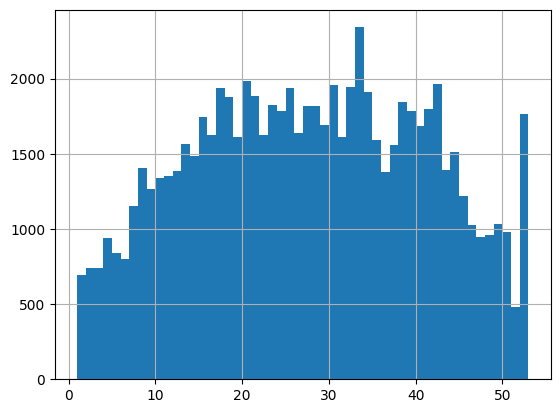

In [ ]:
df['arrival_date_week_number'].hist(bins=52)

Firtsly, we can see that the two graphics are similar. Thats because the information it contains is very similar, as they're just two ways of expressing the same information. Also the date day we have seen in the numerical analysis section it has a very homogenic distribution.

Our conclusions are that keeping the week and the month has no sence, so we will just keep the week. Also we don't think the day of the month is important, so we will also drop it.

From the week column we will create 4 categories, that represent the four seasons, because we think that is a good balance to identify how this can influence a human comportement without having too complex data.





In [ ]:
df = df.drop(columns=['arrival_date_month', 'arrival_date_day_of_month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77200 entries, 40061 to 119389
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     77200 non-null  int64  
 1   lead_time                       77200 non-null  int64  
 2   arrival_date_year               77200 non-null  int64  
 3   arrival_date_week_number        77200 non-null  int64  
 4   stays_in_weekend_nights         77200 non-null  int64  
 5   stays_in_week_nights            77200 non-null  int64  
 6   adults                          77200 non-null  int64  
 7   children                        77200 non-null  float64
 8   meal                            77200 non-null  object 
 9   country                         77200 non-null  object 
 10  market_segment                  77200 non-null  object 
 11  distribution_channel            77200 non-null  object 
 12  is_repeated_guest               

**meal column**:

<Axes: >

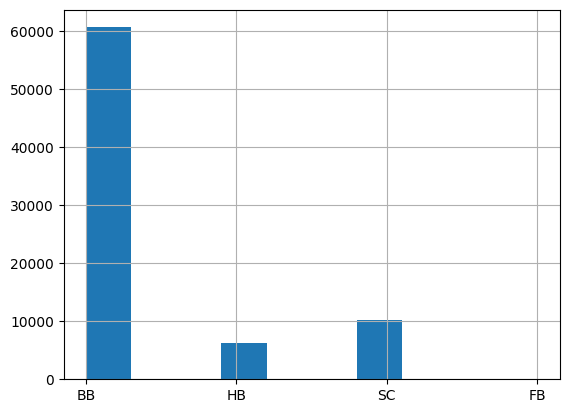

In [ ]:
df["meal"].hist()

Meaning :

* FB : every meal
* BB : Breakfast
* HB : Breakfast and dinner
* SC : Nothing

In [ ]:
df["meal"].value_counts()

,count
meal,
BB,60624
SC,10255
HB,6284
FB,37


To transform the data into numerical values we will attribute 0 for SC (no meal), 1 for BB (one meal), 2 for HB and FB (two or more meals).

**country column**:

In [ ]:
df["country"].value_counts()

,count
country,
PRT,29442
FRA,8733
DEU,6041
GBR,5272
ESP,4562
...,...
NCL,1
SDN,1
ATF,1


We have a lot of different countries in this section that may make the model more complex. Since 40% of the clients are locals (portugal), we are keeping only two categories : locals / non-locals.


**market_segment and distribution_chanel columns**:

These two columns are more or less linked. Let's see at how correlated they are.

In [ ]:
df["market_segment"].value_counts()

,count
market_segment,
Online TA,38123
Offline TA/TO,16312
Groups,13771
Direct,5829
Corporate,2911
Aviation,221
Complementary,33


In [ ]:
df["distribution_channel"].value_counts()

,count
distribution_channel,
TA/TO,67670
Direct,6095
Corporate,3249
GDS,186


Let's create a new dataframe containing only market_segement and distribution_channel. We get dummies for each and we will see how correlated they are.

In [ ]:
dummies_df = pd.get_dummies(df[['market_segment', 'distribution_channel']], drop_first=True)
dummies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77200 entries, 40061 to 119389
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   market_segment_Complementary  77200 non-null  bool 
 1   market_segment_Corporate      77200 non-null  bool 
 2   market_segment_Direct         77200 non-null  bool 
 3   market_segment_Groups         77200 non-null  bool 
 4   market_segment_Offline TA/TO  77200 non-null  bool 
 5   market_segment_Online TA      77200 non-null  bool 
 6   distribution_channel_Direct   77200 non-null  bool 
 7   distribution_channel_GDS      77200 non-null  bool 
 8   distribution_channel_TA/TO    77200 non-null  bool 
dtypes: bool(9)
memory usage: 1.3 MB


<Axes: >

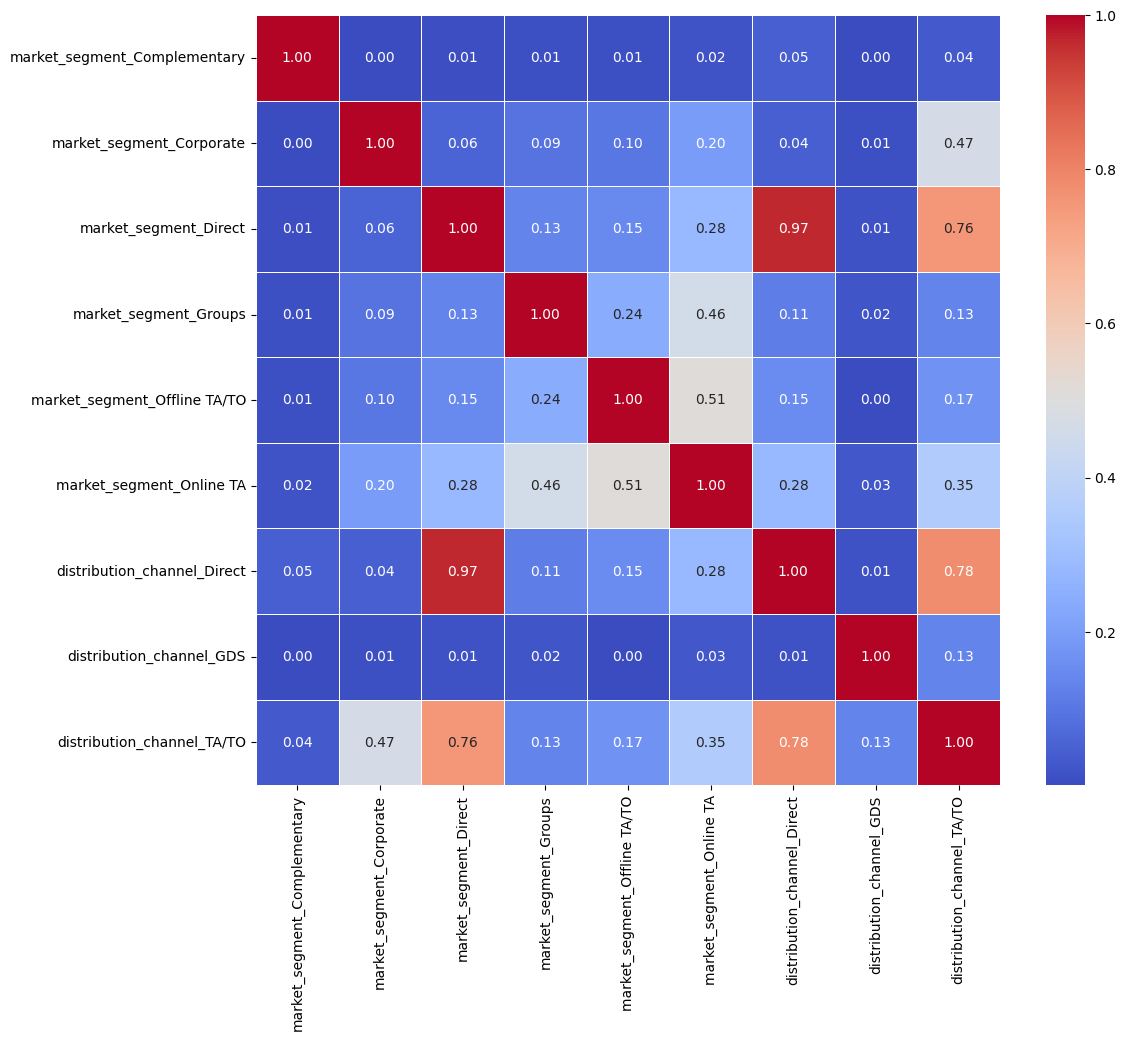

In [ ]:
corr_df = dummies_df.corr().abs()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_df, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

We can observe that some of this information is redundant.
We are goimg to delete **distribution_channel**.

**market_segment** Is going to be divided into four columns: Online TA, Offline TA/TO, Groups, Others


In [ ]:
df = df.drop(columns=['distribution_channel'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77200 entries, 40061 to 119389
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     77200 non-null  int64  
 1   lead_time                       77200 non-null  int64  
 2   arrival_date_year               77200 non-null  int64  
 3   arrival_date_week_number        77200 non-null  int64  
 4   stays_in_weekend_nights         77200 non-null  int64  
 5   stays_in_week_nights            77200 non-null  int64  
 6   adults                          77200 non-null  int64  
 7   children                        77200 non-null  float64
 8   meal                            77200 non-null  object 
 9   country                         77200 non-null  object 
 10  market_segment                  77200 non-null  object 
 11  is_repeated_guest               77200 non-null  int64  
 12  previous_cancellations          

**reserved_room_type column:**

In [ ]:
df["reserved_room_type"].value_counts()

,count
reserved_room_type,
A,60983
D,11510
F,1730
E,1477
B,1064
G,425
C,11


As we already did in the agents column, in order to simplify a little bit, we will keep three columns: A, D, Other.

**deposit_type column:**

In [ ]:
df["deposit_type"].value_counts()

,count
deposit_type,
No Deposit,64343
Non Refund,12837
Refundable,20


Since *Refundable* category represents only 20 rows, we first considered deleting this category, but eventually we think that it has a major role so we will keep all the categories.

**customer_type column:**

In [ ]:
df["customer_type"].value_counts()

,count
customer_type,
Transient,57803
Transient-Party,16847
Contract,2268
Group,282


Here also we think that is important information and it is already quite clear with only 4 categories. We will keep all the categories.

##  6. Summary


**days_in_waiting_list** : Create 6 categories.
* 0
* less than a week
* less than two weeks
* less than a momths
* less than 3 months
* more.

**stays_in_weekend_nights**: Create a 'more than 5 stays_in_weekend_nights' category by replacing every number above 6 by 6.

**stays_in_week_nights**: Create a 'more than 5 stays_in_week_nights' by replacing every number above 6 by 6.

**previous_cancellations**: Create 4 groups.
* 0 day
* 1 day
* 2 - 6 days
* 7 + days

**previous_bookings_not_cancelled**:
* 0 previous bookings
* 1 - 5 previous bookings
* 6 + previous bookings

**booking_changes**:
* 0 booking changes
* 1 booking change
* 2 - 5 booking changes
* 6 + booking changes

**agent** : Keep IDs that represent more than 70% of the total reservations, and the rest will be considered as others.

**arrival_date**: Sort date by seasons (winter, spring, summer, autumn) and delete the arrival_date_month and arrival_date_day.

**meal**: Attribute 0 for SC (no meal), 1 for BB (one meal), 2 for HB and FB (two or more meals).

**country**: Keep only two categories : locals / non-locals.

**market_segement**: divided into four columns.
* Online TA
* Offline TA/TO
* Groups
* Others

**reserved_room_type**: Keep only three columns.
* A
* D
* Other

**deleted columns**:
* index
* hotel
* babies
* reservation_status
* company
* distribution_channel


In [ ]:
df.to_pickle('/content/drive/My Drive/IAAE/data/explored_data.pkl')